# Heart Attack Prediction
The goal of this project is to predict whether a patient is at risk of a heart attack or not.  
The data was sourced from Kaggle and can be found [here](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset).  

In [6]:
import pandas as pd
import os
from os import path
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
print('Imports successful')

Imports successful


## Load in the Data

In [7]:
file_path = path.dirname(os.getcwd()) + '/input/heart.csv'
data = pd.read_csv(file_path)

In [8]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Features in the Data
- age : Age of the patient
- sex : Sex of the patient
- cp : Chest Pain type chest pain type
  - Value 1: Typical angina
  - Value 2: Atypical angina
  - Value 3: Non-anginal pain
  - Value 4: Asymptomatic
- trtbps : Resting blood pressure (in mm Hg)
- chol : Cholestoral in mg/dl fetched via BMI sensor
- fbs : (Fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg : Resting electrocardiographic results
  - Value 0: Normal
  - Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalachh : Maximum heart rate achieved
- exng : Exercise induced angina (1 = yes; 0 = no)
- oldpeak : Previous peak
- slp : Slope
- caa : Number of major vessels (0-3)
- thall : Thal rate
- output : (0 = less chance of heart attack; 1 = more chance of heart attack)

## Data Analysis

In [9]:
data.shape

(303, 14)

I'll check for missing data:

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There is no missing data. I'll proceed with analysis.

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


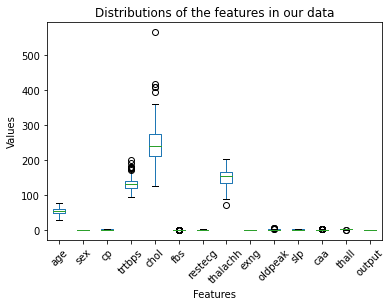

In [12]:
# Plot distributions of data
data.plot.box()
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Distributions of the features in our data');

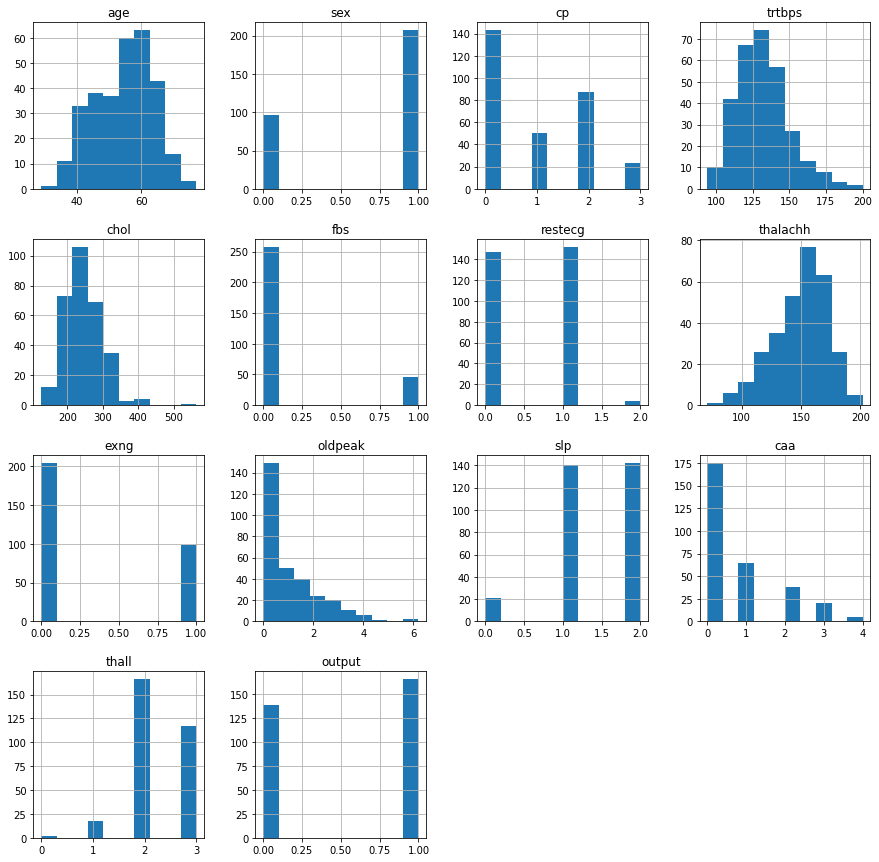

In [13]:
data.hist(figsize=(15,15));

## Preprocessing

Something I observe is that the features are of different types. For instance, `chol`, a feature with continuous data, ranges between the values of 126 and 564; `slp`, a binary column, just falls into two classes, 0 and 1; `thall`, an ordinal columns ranges between 0 and 3. The data contains binary, ordinal and continuous data. 

I will visualize the distributions of the categorical data using countplots and normal distributions using histograms  

Continuous Features:
1. age
2. trtbps
3. chol
4. thalachh
5. oldpeak

Categorical features(ordinal):
1. sex
2. cp
3. fbs
4. restecg
5. exng
6. slp
7. caa
8. thall
9. output

In [14]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='output')
y = data['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32, test_size=0.25)

In [15]:
# Identify columns by type
cont_features = ['age', 'trtbps', 'chol', 'thalachh'] # continuous features
# to_transform = ['oldpeak'] # just the one skewed distribution
# bin_features = ['sex', 'fbs', 'exng'] # binary features
# ord_features = ['cp', 'restecg', 'slp', 'caa', 'thall'] # ordinal features

Some preprocessing steps to be carried out:
- Scale continuous features
- Apply log transformation on the `oldpeak` feature (to turn into from a skewed distribution to a normal distribution)
- Remove outliers
- Perform one hot encoding on ordinal features

### Scaling Continuous Features

In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train[cont_features] = ss.fit_transform(X_train[cont_features])

<ipython-input-16-2d9f7fa50493>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cont_features] = ss.fit_transform(X_train[cont_features])
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


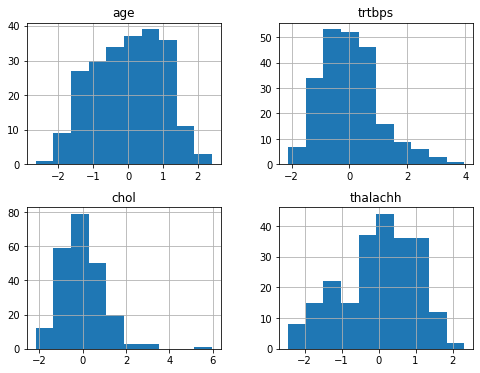

In [17]:
# Visualize transformed columns
X_train[cont_features].hist(figsize=(8,6));

### Applying Log Transformation
The [`sklearn.preprocessing.PowerTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html) class can be used to convert a skewed distribution so it is as Gaussian-like as possible. In our data, the `oldpeak` column is the only skewed distribution, so we will only transform that column in this section.

<ipython-input-18-a2b79e03ab5c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['oldpeak'] = pt.fit_transform(X_train['oldpeak'].values.reshape(-1,1))


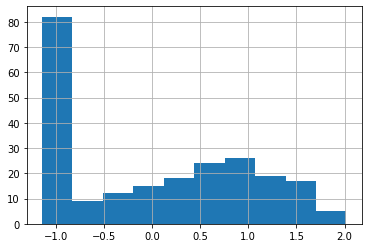

In [18]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

# Fit and transform the skewed feature
X_train['oldpeak'] = pt.fit_transform(X_train['oldpeak'].values.reshape(-1,1))
cont_features.append('oldpeak') #append the oldpeak feauture to the list of continuous features

# Plot the histogram
X_train['oldpeak'].hist();

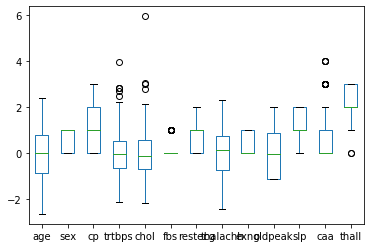

In [19]:
X_train.plot.box();

### Removing Outliers
The strategy I'll use to remove outliers is to eliminate samples whose values are lower than or higher than 1% and 95% respectively for the continuous features.  
Because I intend to add this transformer to my pipeline, I will simply just subclass the `TransformerMixin` class and build a custom transformer using an outlier detection algorithm. I found help with this [here](https://stackoverflow.com/a/52346726/16162645).

In [20]:
from sklearn.neighbors import LocalOutlierFactor
# TODO

## Fitting it all into a Pipeline

In [21]:
from sklearn.pipeline import Pipeline

cont_pipeline = Pipeline([('scale',StandardScaler())])

skewed_pipeline = Pipeline([('normalize', PowerTransformer())])

In [22]:
list(X.columns).index('oldpeak')

9

In [23]:
from sklearn.compose import ColumnTransformer

full_processor = ColumnTransformer(transformers=[
    ('continuous', cont_pipeline, [0,3,4,7,9]),
    ('skewed', skewed_pipeline, [9]) # 9 is the index of the oldpeak column
], 
remainder='passthrough')

## Model Selection and Training
I will use the following five different algorithms
1. DecisionTreeClassifier
2. RandomForestClassifier
3. GradientBoostingClassifier
4. SVM
5. KNeighborClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# Decision Tree Pipeline
dec_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', DecisionTreeClassifier(random_state=32))
])

# Random Forest Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', RandomForestClassifier(random_state=32))
])

# Gradient Boost Pipeline
gb_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', GradientBoostingClassifier(random_state=32))
])

# K nearest neighbor Pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', KNeighborsClassifier())
])

# SVC Pipeline
svc_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', SVC(random_state=32))
])

In [26]:
# Train the models
dec_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)
gb_pipeline.fit(X_train, y_train)
knn_pipeline.fit(X_train, y_train)
svc_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('continuous',
                                                  Pipeline(memory=None,
                                                           steps=[('scale',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 3, 4, 7, 9]),
                                                 ('skewed',
                                                  

## Model Evaluation
I will evaluate the **precision** of each algorithm and select the model that performs best without hyperparameter tuning.

In [27]:
from sklearn.metrics import precision_score

algorithms = {'Decision Tree' : dec_pipeline,
              'Random Forest' : rf_pipeline,
              'Gradient Boost' : gb_pipeline,
              'SVC' : svc_pipeline,
              'K Nearest Neighbor' : knn_pipeline
             }

print(f"{'Algorithm':<20}{'Precision Score':>20}\n")
for name,algorithm in algorithms.items():
    print(f'{name:<20}{precision_score(y_test, algorithm.predict(X_test)):>20.2f}')

Algorithm                Precision Score

Decision Tree                       0.80
Random Forest                       0.81
Gradient Boost                      0.88
SVC                                 0.51
K Nearest Neighbor                  0.51


## Model Optimization

In [29]:
from sklearn.model_selection import GridSearchCV
# TODO

## Conclusion

In [30]:
import joblib
from os import path, getcwd

file_path = path.dirname(os.getcwd()) + '/models/gb-model.pkl'

joblib.dump(gb_pipeline, file_path) 

['/mnt/batch/tasks/shared/LS_root/mounts/clusters/ml-course/code/Users/heart-attack/models/gb-model.pkl']